In this assignment we'll ask you to plot multiple variables.   

You will use what you find in this assignment to answer the questions in the quiz that follows. It may be useful to keep this notebook side-by-side with this week's quiz on your screen.

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

path = "Cartwheeldata.csv"

In [9]:
# First, you must import the cartwheel data from the path given above
# using pandas, read in the csv data found at the url defined by 'path'
df = pd.read_csv(path)

In [18]:
# Next, look at the 'head' of our DataFrame 'df'. 
df.head()


,ID,Age,Gender,GenderGroup,Glasses,GlassesGroup,Height,Wingspan,CWDistance,Complete,CompleteGroup,Score
0,1,56,F,1,Y,1,62.0,61.0,79,Y,1,7
1,2,26,F,1,Y,1,62.0,60.0,70,Y,1,8
2,3,33,F,1,Y,1,66.0,64.0,85,Y,1,7
3,4,39,F,1,N,0,64.0,63.0,87,Y,1,10
4,5,27,M,2,N,0,73.0,75.0,72,N,0,4


In [19]:
df.columns

Index(['ID', 'Age', 'Gender', 'GenderGroup', 'Glasses', 'GlassesGroup',
       'Height', 'Wingspan', 'CWDistance', 'Complete', 'CompleteGroup',
       'Score'],
      dtype='object')

If you can't remember a function, open a previous notebook or video as a reference, or use your favorite search engine to look for a solution.

## Scatter plots

First, let's looks at two variables that we expect to have a strong relationship, 'Height' and 'Wingspan'.

            Height  Wingspan
Height    1.000000  0.954018
Wingspan  0.954018  1.000000




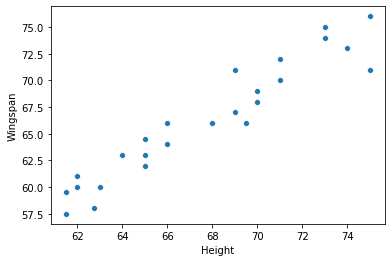

In [17]:
# Make a Seaborn scatter plot with x = height and y = wingspan using sns.scatterplot(x, y)
sns.scatterplot(x="Height", y="Wingspan", data=df)
print(df.loc[:, ["Height", "Wingspan"]].dropna().corr())
print("\n")


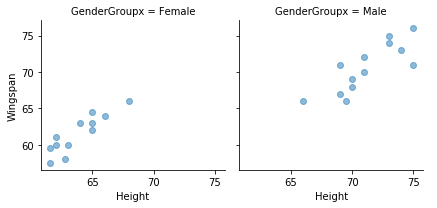

In [21]:
df["GenderGroupx"] = df.GenderGroup.replace({1: "Female", 2: "Male"}) 
sns.FacetGrid(df, col="GenderGroupx").map(plt.scatter, "Height", "Wingspan", alpha=0.5).add_legend()

How would you describe the relationship between 'Height' and 'Wingspan'?   
Questions you can ask:
* Is it linear?
* Are there outliers?
* Are their ranges similar or different?  

How else could you describe the relationship?

Now let's look at two variables that we don't yet assume have a strong relationship, 'Wingspan' and 'CWDistance'

            Wingspan  CWDistance
Wingspan    1.000000    0.297662
CWDistance  0.297662    1.000000




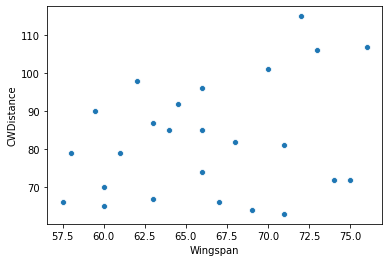

In [22]:
# Make a Seaborn scatter plot with x = wingspan and y = cartwheel distance
sns.scatterplot(x="Wingspan", y="CWDistance", data=df)
print(df.loc[:, ["Wingspan", "CWDistance"]].dropna().corr())
print("\n")


How would you describe the relationship between 'Wingspan' and 'CWDistance'?   
* Is it linear?
* Are there outliers?
* Are their ranges similar or different?  

How else could you describe the relationship?

Let makes the same plot as above, but now include 'Gender' as the color scheme by including the argument
```
hue=df['Gender']
```
in the Seaborn function

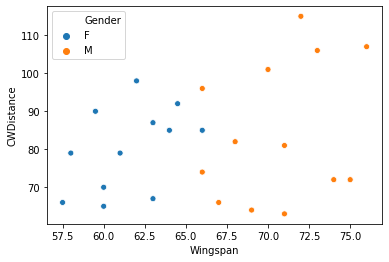

In [24]:
# Make a Seaborn scatter plot with x = wingspan and y = cartwheel distance, and hue = gender
sns.scatterplot(x="Wingspan", y="CWDistance", data=df, hue = "Gender" )


Is the interquartile range of ‘CWDistance’ similar to ‘Wingspan’?

In [29]:
iqrCWDistance = np.subtract(*np.percentile(df.CWDistance, [75, 25]))
iqrCWDistance

22.0

In [30]:
iqrWingspan = np.subtract(*np.percentile(df.Wingspan, [75, 25]))
iqrWingspan

9.0

Does does this new information on the plot change your interpretation of the relationship between 'Wingspan' and 'CWDistance'?

## Barcharts
Now lets plot barplots of 'Glasses'

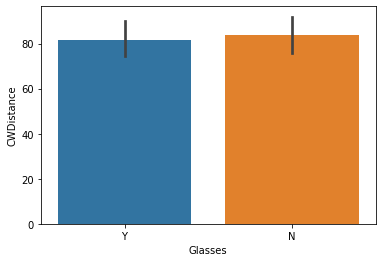

In [31]:
# Make a Seaborn barplot with x = glasses and y = cartwheel distance
sns.barplot(x="Glasses", y="CWDistance", data=df)


What can you say about the relationship of 'Glasses' and 'CWDistance'?

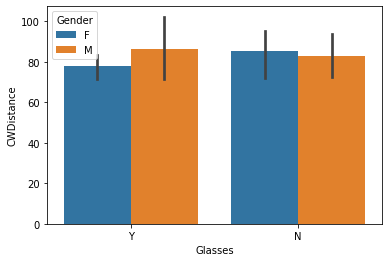

In [32]:
# Make the same Seaborn boxplot as above, but include gender for the hue argument
sns.barplot(x="Glasses", y="CWDistance", data=df, hue = "Gender")


How does this new plot change your interpretation about the relationship of 'Glasses' and 'CWDistance'?